In [1]:
pip install tensorflow[and-cuda]

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of tensorflow[and-cuda] to determine which version is compatible with other requirements. This could take a while.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nvidia-nccl-cu12==2.19.3; extra == "and-cuda" (from tensorflow[and-cuda]) (from versions: 0.0.1.dev5)
ERROR: No matching distribution found for nvidia-nccl-cu12==2.19.3; extra == "and-cuda"

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
batch_size = 32
image_size = (32, 32)
num_classes = 10

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and augment test data
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
)

# Evaluate the model
#test_loss, test_acc = model.evaluate(test_generator, verbose=2)
#print('\nTest accuracy:', test_acc)


Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.
Epoch 1/100


C:\Users\muzyk\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.2712 - loss: 1.9351 - val_accuracy: 0.4149 - val_loss: 1.6064
Epoch 2/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.4131 - loss: 1.5982 - val_accuracy: 0.4771 - val_loss: 1.4386
Epoch 3/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.4497 - loss: 1.5087 - val_accuracy: 0.5052 - val_loss: 1.3616
Epoch 4/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.4820 - loss: 1.4360 - val_accuracy: 0.5262 - val_loss: 1.3055
Epoch 5/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.4962 - loss: 1.3882 - val_accuracy: 0.5359 - val_loss: 1.2754
Epoch 6/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.5101 - loss: 1.3585 - val_accuracy: 0.5300 - val_loss: 1.3408
Epoch 7/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 86s 31ms/step - accuracy: 0.5210 - loss: 1.3296 - val_accuracy: 0.5590 - val_loss: 1.2238
Epoch 8/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 87s 31ms/step - accuracy: 0.5268 - los

KeyboardInterrupt: 

1/1 [==============================] - 0s 17ms/step


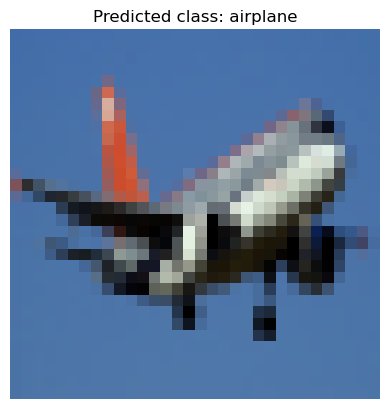

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image

# Get a random image from the test set
#random_class = 'plane'
#random_image_path = os.path.join('data/test', random_class)
random_image_files = os.listdir('data/test')
random_image_file = np.random.choice(random_image_files)
random_image = image.load_img(os.path.join('data/test', random_image_file), target_size=image_size)
random_image_array = image.img_to_array(random_image)
random_image_array = np.expand_dims(random_image_array, axis=0) / 255.0  # Rescale to [0,1]

# Predict the class of the random image
predictions = model.predict(random_image_array)
predicted_class_index = np.argmax(predictions)
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]

# Display the image and its predicted class
plt.imshow(random_image)
plt.title(f'Predicted class: {predicted_class}')
plt.axis('off')
plt.show()


## inne

In [20]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import pathlib
import cv2
import os
from os import listdir
import glob
from PIL import Image

cinic_directory_train = './data/train'
cinic_directory_test = './data/test'

class_name = []
file_name='output_fromKeras.csv'
optimiser='adamax' # les best : Adam, nadam et adamax
nb_epochs=50
batch_size_choice=16
image_size=(32, 32)
loss_func='sparse_categorical_crossentropy'

In [21]:
# loading in the data 
train_ds = keras.preprocessing.image_dataset_from_directory(
    cinic_directory_train,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size_choice
)

Found 90000 files belonging to 10 classes.
Using 72000 files for training.


In [22]:
# loading in the data 
validation_ds = keras.preprocessing.image_dataset_from_directory(
    cinic_directory_train,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size_choice
)

Found 90000 files belonging to 10 classes.
Using 18000 files for validation.


In [23]:
class_names= train_ds.class_names
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [24]:
def make_model_keras2(input_shape, num_classes):
    # Build the model using the functional API
    # input layer
    i = keras.Input(shape=input_shape)
    x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(i)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)

    x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)

    x = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)

    x = keras.layers.Flatten()(x)
    x = keras.layers.Dropout(0.2)(x)

    # Hidden layer
    x = keras.layers.Dense(1024, activation='relu')(x)
    x = keras.layers.Dropout(0.2)(x)

    # last hidden layer i.e.. output layer
    x = keras.layers.Dense(num_classes, activation='softmax')(x)

    return keras.Model(i, x)

In [25]:
model = make_model_keras2(input_shape=(32,32, 3), num_classes=10)

model.compile(
    optimizer=optimiser,  #Fonction d'optimisation    
    loss=loss_func, #voir la doc de tensorflow "losses"
    metrics=['accuracy']
)

In [26]:
resultFile = []

total = 0
list = os.scandir(cinic_directory_test)
for testPicture in list:
    image_to_predict = cv2.imread(testPicture.path, cv2.IMREAD_COLOR)
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict, (32, 32)), axis=0)
    
    #prediction
    res = np.argmax(model.predict(img_to_predict), axis=-1)
    resultFile.append(testPicture.name + ',' + class_names[res[0]])
    
    total += 1
    print("Total images : " + str(total), end='\r')
    # print(resultFile)
    
    
    
f = open(file_name, 'w')
f.write('filename,label')
f.write('\n')
for resultLine in resultFile:
    f.write(resultLine)
    f.write('\n')
f.close()

1/1 [==============================] - 0s 65ms/step
